In [ ]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    # Get the GPU device
    device = torch.device("cuda")

    # Get the GPU name
    gpu_name = torch.cuda.get_device_name(0)

    # Get the GPU memory in bytes
    gpu_memory_bytes = torch.cuda.get_device_properties(0).total_memory

    # Convert bytes to gigabytes
    gpu_memory_gb = gpu_memory_bytes / (1024 ** 3)

    print(f"GPU: {gpu_name}")
    print(f"GPU Memory: {gpu_memory_gb:.2f} GB")
else:
    print("No GPU available. Switch to a GPU runtime in Colab.")

GPU: Tesla T4
GPU Memory: 14.75 GB


In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: f:\cse475\banana\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf

In [3]:
import os

# Check if a GPU is available
gpu_available = tf.test.is_gpu_available()

if gpu_available:
    # Get GPU details using system command
    command = "nvidia-smi --query-gpu=gpu_name --format=csv,noheader"
    gpu_model = os.popen(command).read().strip()

    if gpu_model:
        print("GPU Model:", gpu_model)
print('Oghhhhhhfg')

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU Model: NVIDIA GeForce GTX 1650
Oghhhhhhfg


In [ ]:
#loading dataset

In [3]:
datauc = tf.keras.utils.image_dataset_from_directory('data', batch_size = 32, image_size = (224,224))

Found 16091 files belonging to 3 classes.


In [4]:
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

In [ ]:
#normalization

In [5]:
def preprocess_images(images, labels):
    images = preprocess_input(images)
    return images, labels

# Apply normalization to the dataset
datauc_normalized = datauc.map(preprocess_images)

In [ ]:
#visualization

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data_iterator = datauc_normalized.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

In [11]:
batch[0].min()

-1.0

In [ ]:
#splitting

In [6]:
train_size = int(len(datauc_normalized) * 0.7)

val_size = int(len(datauc_normalized) * 0.2)

test_size = int(len(datauc_normalized) * 0.1)

In [7]:
train = datauc_normalized.take(train_size)
val = datauc_normalized.skip(train_size).take(val_size)
test = datauc_normalized.skip(train_size + val_size).take(test_size)

In [ ]:
#dependencies

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, History
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping


In [15]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

219055592/219055592 [==============================] - 21s 0us/step


In [16]:
model = Sequential()

In [17]:
from keras.regularizers import l2

In [ ]:
#model custoozation

In [18]:
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.0000018)))
model.add(Dropout(0.20))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.0018)))
model.add(Dropout(0.20))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.0018)))
model.add(Dense(3, activation='softmax'))
# Freeze the layers of the VGG19 base
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
#compilation

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training

In [20]:
history = History()
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[history])

Epoch 1/50
352/352 [==============================] - 379s 980ms/step - loss: 0.9118 - accuracy: 0.8769 - val_loss: 0.4074 - val_accuracy: 0.9466
Epoch 2/50
352/352 [==============================] - 336s 953ms/step - loss: 0.3779 - accuracy: 0.9491 - val_loss: 0.3212 - val_accuracy: 0.9597
Epoch 3/50
352/352 [==============================] - 327s 926ms/step - loss: 0.3083 - accuracy: 0.9617 - val_loss: 0.2727 - val_accuracy: 0.9678
Epoch 4/50
352/352 [==============================] - 327s 927ms/step - loss: 0.2535 - accuracy: 0.9711 - val_loss: 0.2482 - val_accuracy: 0.9691
Epoch 5/50
352/352 [==============================] - 328s 930ms/step - loss: 0.2126 - accuracy: 0.9761 - val_loss: 0.2090 - val_accuracy: 0.9719
Epoch 6/50
352/352 [==============================] - 327s 926ms/step - loss: 0.1729 - accuracy: 0.9828 - val_loss: 0.1998 - val_accuracy: 0.9731
Epoch 7/50
352/352 [==============================] - 327s 926ms/step - loss: 0.1616 - accuracy: 0.9819 - val_loss: 0.1938 -

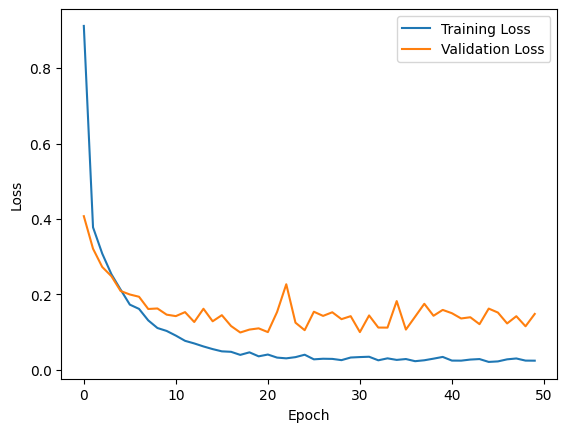

In [21]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
from tensorflow.keras.metrics import SparseCategoricalAccuracy
sparse_accuracy = SparseCategoricalAccuracy()
for bat in test.as_numpy_iterator():
    X, y = bat
    yhat = model.predict(X)
    sparse_accuracy.update_state(y, yhat)
print("Test Accuracy: ", sparse_accuracy.result())

1/1 [==============================] - 1s 1s/step
Test Accuracy:  tf.Tensor(0.9725, shape=(), dtype=float32)


In [ ]:
#saving the model

In [23]:
import os
model.save(os.path.join('models','inceptin.h5'))

In [ ]:
#evaluation

In [8]:
import os
from tensorflow.keras.models import load_model

In [9]:
model_path = os.path.join('models', 'inceptin.h5')

# Load the trained model
model = load_model(model_path)

In [10]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming 'test' is a TensorFlow dataset
# Replace 'your_model' with your actual trained model


# Initialize empty arrays to store predictions and true labels
all_y_pred = np.array([], dtype=int)
all_true_labels = np.array([], dtype=int)

# Iterate through test batches
for batch in test.as_numpy_iterator():
    # Assuming 'model' is your trained model
    Y_pred_batch = model.predict(batch[0])  # assuming batch[0] contains input data
    y_pred_batch = np.argmax(Y_pred_batch, axis=1)
    
    # Concatenate batch predictions and true labels to the overall arrays
    all_y_pred = np.concatenate([all_y_pred, y_pred_batch])
    all_true_labels = np.concatenate([all_true_labels, batch[1]])  # assuming batch[1] contains true labels

# After processing all test batches, print the classification report
print(classification_report(all_true_labels, all_y_pred))


1/1 [==============================] - 0s 93ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       565
           1       0.98      0.98      0.98       465
           2       0.99      0.99      0.99       570

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [ ]:
pip install seaborn

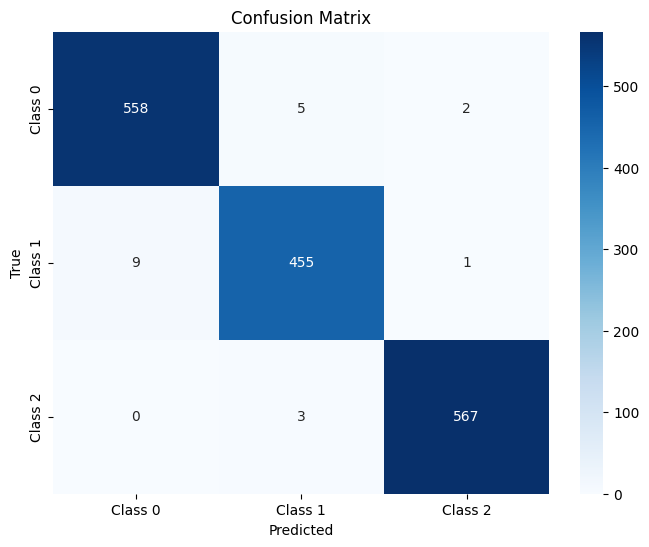

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_true_labels' and 'all_y_pred' are already defined

# Compute confusion matrix
cm = confusion_matrix(all_true_labels, all_y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()